source/0185.pdf300.png
0185.pdf300
test/0185.pdf300/308-1122-132-35.png
0.033039018511772156
test/0185.pdf300/717-1551-124-36.png
0.021453291177749634
[PosixPath('test/0185.pdf300/308-1122-132-35.png'), PosixPath('test/0185.pdf300/717-1551-124-36.png')]


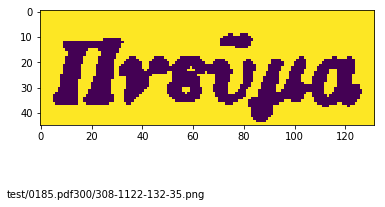

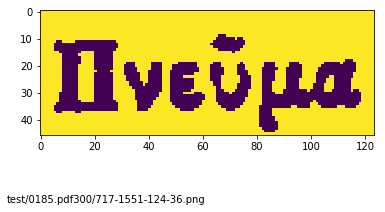

In [9]:
import cv2 as cv2  
from matplotlib import pyplot as plt
import numpy as np
import re

import shutil
import glob, os

%run PgFunctions.py 
ip=!wget -qO - ipv4bot.whatismyipaddress.com
def compareHUandSC(queryFile, dataFile):
        
        params={}
        
        query= cv2.imread(queryFile,0);
        erodeimg=applyCircleErosion(query)
        _, QueryContours, _ = cv2.findContours(erodeimg, cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE) 
        
        
        data = cv2.imread(filename,0)

        if data is None:
            params["DA"]="NONE"
            return params
        else:
            params["DA"]="EXIST"
            erodedata=applyCircleErosion(data)
            _, DataContours, _ = cv2.findContours(erodedata, cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE) 
        
        
        
        if len(DataContours)>1:
            params["CO"]="EXIST"
           
            
            
            #cut off the very disimilar images using HU moments for speeding the algorithm
            ret = cv2.matchShapes(QueryContours[1],DataContours[1],3,0.0)
            params["HU"]=ret
            if ret<0.1:
                sd = cv2.createShapeContextDistanceExtractor()
                try:
                    abc = sd.computeDistance(QueryContours[1],DataContours[1])
                    params["SC-CM"]="EXIST"
                    params["SC"]=abc    
                    (x, y, w, h) = cv2.boundingRect(DataContours[1])   
                    OSfilename=Path(filename)
                    params["PA"]=OSfilename
                   
                except:
                    params["SC-CM"]="NONE" 
                    (x, y, w, h) = cv2.boundingRect(DataContours[1])
                    OSfilename=Path(filename)
                    params["PA"]=OSfilename
            #return
        else:
                params["CO"]="NONE"
                #print(filename)
                #x=0
        return params 
            
            
#END FUNCTION            
            
            
     
    
    
    
    
    
    
    
    
            
            
            



#query= cv2.imread("word/fos.png",0);
#query= cv2.imread("word/kyrios2.png",0);
#query= cv2.imread("word/kyrios.png",0);
wordlinks=[]





#for filename in glob.glob("source/*pdf300.png"):
for filename in glob.glob("source/0185.pdf300.png"):
#for filename in glob.glob("source/0189.pdf300.png"):    
    print(filename)
    filename_w_ext = os.path.basename(filename)
    name, extension = os.path.splitext(filename_w_ext)
    print(name)
    folder=name
    
    
    
    #erode query
    
    
    count=0
    
    
    content=''
    
    for filename in glob.glob("test/"+folder+"/*.png"):
        
        
        filename_w_ext = os.path.basename(filename)
        name, extension = os.path.splitext(filename_w_ext)
        
        coords=name.split("-")
        
        
        
       
        
        #break
        
        #queryFile= "word/kyrios.png"
        
        queryFile= "word/pneuma.png"
        dataFile=filename
        results=compareHUandSC(queryFile, dataFile)
        #print(results)
        if "SC" in results:
            if results["SC"]<0.06:
                wordlinks.append(results["PA"])
                divB='<div style="'+'position: absolute;top: '+coords[0]+'px;left:'+coords[1]+'px;border: 3px solid red;position: absolute;">'
                divE='</div>'
                imgtag=divB+'<img src="'+ filename +'">'+divE
                content=content+imgtag
                f=results["PA"]
                print(results["PA"])
                print(results["SC"])
                
                
                #print(ip[0])
                fig=plt.figure()
                fig.text(.05,.05,results["PA"])
                img= cv2.imread(filename,0);
                plt.imshow(img)
                
                
                
                
            else:
                divB='<div style="'+'position: absolute;top: '+coords[0]+'px;left:'+coords[1]+'px;border: 1px solid blue;position: absolute;">'
                divE='</div>'
                imgtag=divB+'<img src="'+ filename +'">'+divE
                content=content+imgtag
        else:
            divB='<div style="'+'position: absolute;top: '+coords[0]+'px;left:'+coords[1]+'px;border: 1px solid blue;position: absolute;">'
            divE='</div>'
            imgtag=divB+'<img src="'+ filename +'">'+divE
            content=content+imgtag
    
    
    #!echo {content} > searchResults.html
    resFile='resultsSpot/'+folder+'.html'
    !echo > {resFile}
    f = open(resFile, "w")
    f.write(content)
    f.close()
    
    
    
    
print(wordlinks)    
with open('searchResults.html', 'w') as f:
    for item in wordlinks:
        wordtag='<img src="'+ str(item) +'">'
        f.write("%s\n" % wordtag)

51.158.78.247
